In [202]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.grid_search import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.cross_validation import KFold, cross_val_score
import xgboost as xgb
#Settings
pd.options.mode.chained_assignment = None
pd.set_option('display.max_columns', 100)

In [4]:
train_data = pd.read_csv('~/PYTHON/DrivenData/blood_donations/train_data.csv')
test_data = pd.read_csv('~/PYTHON/DrivenData/blood_donations/test_data.csv')

print(train_data.shape)
print(test_data.shape)

(576, 6)
(200, 5)


In [26]:
train_cols = train_data.columns
test_cols = test_data.columns
train_data.head()
#test_data.head()

,Unnamed: 0,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
0,619,2,50,12500,98,1
1,664,0,13,3250,28,1
2,441,1,16,4000,35,1
3,160,2,20,5000,45,1
4,358,1,24,6000,77,0


In [27]:
#No N/A Values
train_data[train_data.isnull().any(axis=1)==True]

,Unnamed: 0,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007


In [28]:
train_data.describe()

,Unnamed: 0,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
count,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000
mean,374.034722,9.439236,5.427083,1356.770833,34.050347,0.239583
std,216.947773,8.175454,5.740010,1435.002556,24.227672,0.427200
min,0.000000,0.000000,1.000000,250.000000,2.000000,0.000000
25%,183.750000,2.000000,2.000000,500.000000,16.000000,0.000000
50%,375.500000,7.000000,4.000000,1000.000000,28.000000,0.000000
75%,562.500000,14.000000,7.000000,1750.000000,49.250000,0.000000
max,747.000000,74.000000,50.000000,12500.000000,98.000000,1.000000


In [35]:
train_data.pivot_table(index=train_cols[-1], values=train_cols[1:-1],aggfunc=np.mean)

,Months since First Donation,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.)
Made Donation in March 2007,,,,
0,34.319635,10.636986,4.716895,1179.223744
1,33.195652,5.637681,7.681159,1920.289855


In [39]:
train_cols[1:]

Index(['Months since Last Donation', 'Number of Donations',
       'Total Volume Donated (c.c.)', 'Months since First Donation',
       'Made Donation in March 2007'],
      dtype='object')

In [40]:
corr = train_data.loc[:,train_cols[1:]].corr()
corr

,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
Months since Last Donation,1.000000,-0.159731,-0.159731,0.186899,-0.261234
Number of Donations,-0.159731,1.000000,1.000000,0.622116,0.220615
Total Volume Donated (c.c.),-0.159731,1.000000,1.000000,0.622116,0.220615
Months since First Donation,0.186899,0.622116,0.622116,1.000000,-0.019819
Made Donation in March 2007,-0.261234,0.220615,0.220615,-0.019819,1.000000


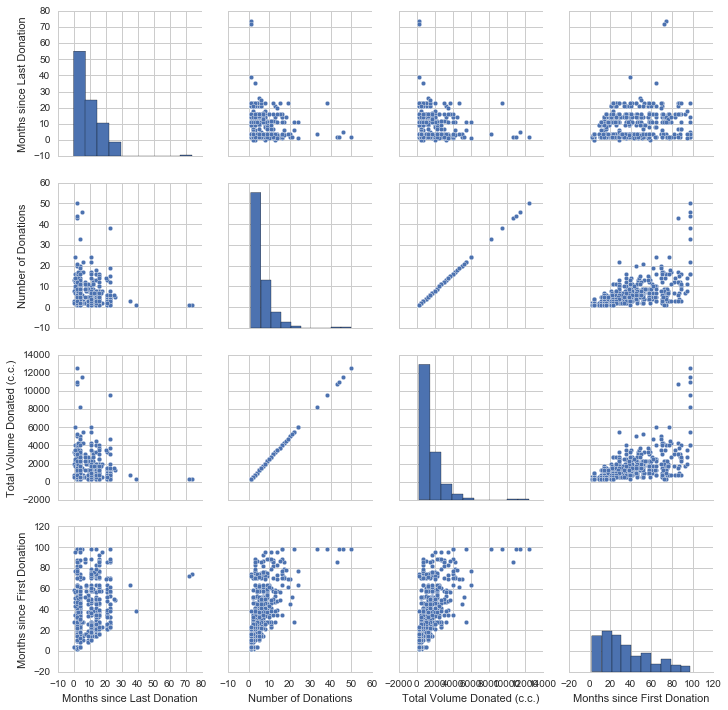

In [43]:
sns.set_style('whitegrid')
sns.pairplot(train_data.loc[:,train_cols[1:-1]])

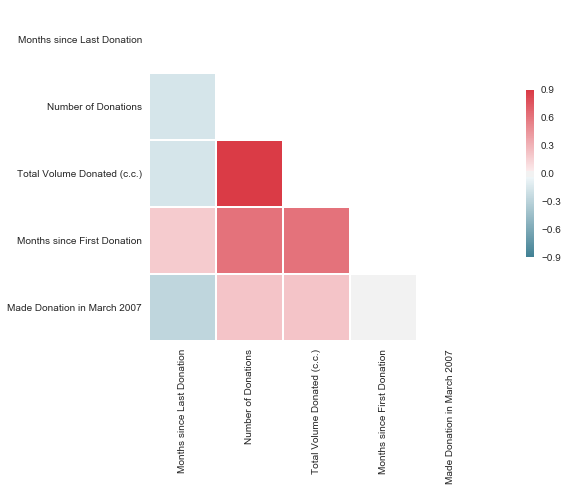

In [45]:
plt.figure(figsize=(15,6))
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr,mask=mask, cmap=cmap, vmax=.9,
            square=True,
            linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

In [195]:
kf_10 = KFold(train_data.shape[0], n_folds = 10, shuffle = True, random_state = 12345)

In [161]:
lr_model = LogisticRegression()
lr_model.fit(train_data[test_cols[1:]], train_data.iloc[:,-1])
lr_10_cv = cross_val_score(lr_model, train_data[test_cols[1:]], train_data.iloc[:,-1],cv=kf_10)
print(np.mean(lr_10_cv));print(lr_10_cv.max());print(lr_10_cv.min());print(lr_10_cv.max()-lr_10_cv.min())
lr_model

0.763762855414
0.862068965517
0.689655172414
0.172413793103


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [162]:
lr_param_grid = {'C': [3,2,1,0.5,0.1,0.01,0.001]}
lr_grid = GridSearchCV(lr_model, lr_param_grid, cv=10)
lr_grid.fit(train_data[test_cols[1:]], train_data.iloc[:,-1])
lr_grid.best_params_

{'C': 1}

In [196]:
best_lr = LogisticRegression(C=1)
best_lr.fit(train_data[test_cols[1:]], train_data.iloc[:,-1])
best_lr_probs = best_lr.predict_proba(train_data[test_cols[1:]])[:,1]
lr_fpr, lr_tpr, lr_thresholds = roc_curve(train_data.iloc[:,-1], best_lr_probs)
cross_val_score(best_lr, train_data[test_cols[1:]], train_data.iloc[:,-1],cv=kf_10).mean()

0.76385359951603149

In [143]:
svm_model = SVC(C=0.1)
svm_model.fit(train_data[test_cols[1:]], train_data.iloc[:,-1])
svm_10_cv = cross_val_score(svm_model, train_data[test_cols[1:]], train_data.iloc[:,-1],cv=kf_10)
print(np.mean(svm_10_cv));print(svm_10_cv.max());print(svm_10_cv.min());print(svm_10_cv.max()-svm_10_cv.min())
svm_model

0.760133091349
0.879310344828
0.672413793103
0.206896551724


SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [150]:
svm_param_grid = {'C': [3,2,1,0.5,0.1,0.01,0.001],
                  'cache_size':[200,100,300]}
svm_grid = GridSearchCV(svm_model, svm_param_grid, cv=10)
svm_grid.fit(train_data[test_cols[1:]], train_data.iloc[:,-1])
svm_grid.best_params_

{'C': 0.1, 'cache_size': 200}

In [197]:
best_svm = SVC(C=0.1,cache_size=200,probability=True)
best_svm.fit(train_data[test_cols[1:]], train_data.iloc[:,-1])
best_svm_probs = best_svm.predict_proba(train_data[test_cols[1:]])[:,1]
svm_fpr, svm_tpr, svm_thresholds = roc_curve(train_data.iloc[:,-1], best_svm_probs)
cross_val_score(best_svm, train_data[test_cols[1:]], train_data.iloc[:,-1],cv=kf_10).mean()

0.76043557168784026

In [144]:
ada_model = AdaBoostClassifier()
ada_model.fit(train_data[test_cols[1:]], train_data.iloc[:,-1])
ada_10_cv = cross_val_score(ada_model, train_data[test_cols[1:]], train_data.iloc[:,-1],cv=kf_10)
print(np.mean(ada_10_cv));print(ada_10_cv.max());print(ada_10_cv.min());print(ada_10_cv.max()-ada_10_cv.min())
ada_model

0.801845130067
0.896551724138
0.684210526316
0.212341197822


AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)

In [151]:
ada_param_grid = {'learning_rate': [3,2,1,0.5,0.1,0.01,0.001],
                  'n_estimators':[10,25,50,100,200]}
ada_grid = GridSearchCV(ada_model, ada_param_grid, cv=10)
ada_grid.fit(train_data[test_cols[1:]], train_data.iloc[:,-1])
ada_grid.best_params_

{'learning_rate': 0.5, 'n_estimators': 25}

In [198]:
best_ada = AdaBoostClassifier(learning_rate=0.5,n_estimators=25)
best_ada.fit(train_data[test_cols[1:]], train_data.iloc[:,-1])
best_ada_probs = best_ada.predict_proba(train_data[test_cols[1:]])[:,1]
ada_fpr, ada_tpr, ada_thresholds = roc_curve(train_data.iloc[:,-1], best_ada_probs)
cross_val_score(best_ada, train_data[test_cols[1:]], train_data.iloc[:,-1],cv=kf_10).mean()

0.77776769509981847

In [145]:
xgb_model = xgb.XGBClassifier()
xgb_model.fit(train_data[test_cols[1:]], train_data.iloc[:,-1])
xgb_10_cv = cross_val_score(xgb_model, train_data[test_cols[1:]], train_data.iloc[:,-1],cv=kf_10)
print(np.mean(xgb_10_cv));print(xgb_10_cv.max());print(xgb_10_cv.min());print(xgb_10_cv.max()-xgb_10_cv.min())
xgb_model

0.774016938899
0.896551724138
0.666666666667
0.229885057471


XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [154]:
xgb_param_grid = {'base_score': [0.75,0.5,0.1,0.01,0.001],
                  'learning_rate':[3,2,1,0.5,0.1,0.01,0.001],
                  'max_depth':[3,2,1,4,5,6],
                  'n_estimators':[100,200,300,50,25,10]}
xgb_grid = GridSearchCV(xgb_model, xgb_param_grid, cv=10)
xgb_grid.fit(train_data[test_cols[1:]], train_data.iloc[:,-1])
xgb_grid.best_params_

{'base_score': 0.5, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}

In [199]:
best_xgb = xgb.XGBClassifier(base_score=0.5, learning_rate=0.01, n_estimators=50, max_depth=3)
best_xgb.fit(train_data[test_cols[1:]], train_data.iloc[:,-1])
best_xgb_probs = best_xgb.predict_proba(train_data[test_cols[1:]])[:,1]
xgb_fpr, xgb_tpr, xgb_thresholds = roc_curve(train_data.iloc[:,-1], best_xgb_probs)
cross_val_score(best_xgb, train_data[test_cols[1:]], train_data.iloc[:,-1],cv=kf_10).mean()

0.77598306110102844

In [146]:
rf_model = RandomForestClassifier(n_estimators = 100)
rf_model.fit(train_data[test_cols[1:]], train_data.iloc[:,-1])
rf_10_cv = cross_val_score(rf_model, train_data[test_cols[1:]], train_data.iloc[:,-1],cv=kf_10)
print(np.mean(rf_10_cv));print(rf_10_cv.max());print(rf_10_cv.min());print(rf_10_cv.max()-rf_10_cv.min())
rf_model

0.741076830006
0.827586206897
0.649122807018
0.178463399879


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [155]:
rf_param_grid = {'min_samples_leaf': [1,3,5,7,9],
                  'min_samples_split':[2,3,4,5],
                  'n_estimators':[100,200,300,50,25,10]}
rf_grid = GridSearchCV(rf_model, rf_param_grid, cv=10)
rf_grid.fit(train_data[test_cols[1:]], train_data.iloc[:,-1])
rf_grid.best_params_

{'min_samples_leaf': 9, 'min_samples_split': 3, 'n_estimators': 100}

In [200]:
best_rf = RandomForestClassifier(n_estimators=100, min_samples_leaf=9,min_samples_split=3)
best_rf.fit(train_data[test_cols[1:]], train_data.iloc[:,-1])
best_rf_probs = best_rf.predict_proba(train_data[test_cols[1:]])[:,1]
rf_fpr, rf_tpr, rf_thresholds = roc_curve(train_data.iloc[:,-1], best_rf_probs)
cross_val_score(best_rf, train_data[test_cols[1:]], train_data.iloc[:,-1],cv=kf_10).mean()

0.78977616454930422

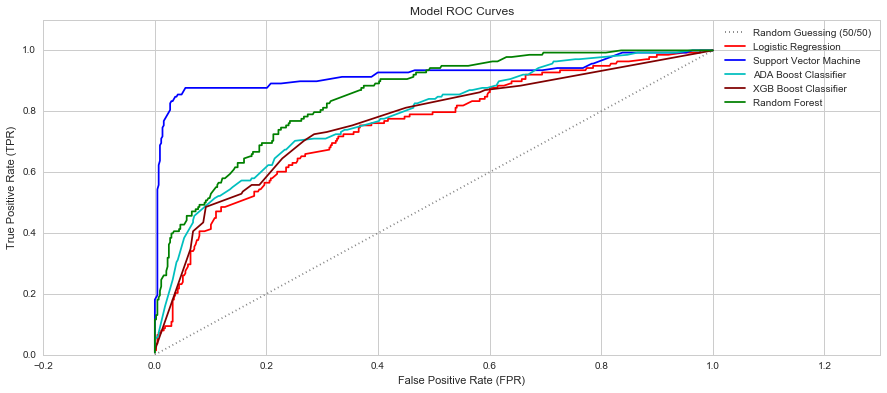

In [203]:
#plots
plt.figure(figsize=(15,6)); plt.xlim([-0.2, 1.3]); plt.ylim([0, 1.1])
plt.title('Model ROC Curves'); plt.xlabel('False Positive Rate (FPR)'); plt.ylabel('True Positive Rate (TPR)')
plt.plot([0,1],[0,1], c='grey',ls=':',label='Random Guessing (50/50)')
plt.plot(lr_fpr, lr_tpr,c='r',label='Logistic Regression')
plt.plot(svm_fpr, svm_tpr,c='b', label='Support Vector Machine')
plt.plot(ada_fpr, ada_tpr, c='c', label='ADA Boost Classifier')
plt.plot(xgb_fpr, xgb_tpr, c='maroon', label='XGB Boost Classifier')
plt.plot(rf_fpr, rf_tpr, c='g', label='Random Forest')
plt.legend()
plt.show()

In [278]:
def re_iterate(model, X_train, Y_train, folds, iterations):
    avg_c_val_scores = []
    avg_probs = pd.DataFrame()
    for i in range(iterations):
        r_state = random.randint(1,1000000)
        kf = KFold(X_train.shape[0], n_folds=folds, shuffle=True, random_state=r_state)
        model.fit(X_train, Y_train)
        c_val_score = cross_val_score(model, X_train, Y_train,cv=kf)
        avg_c_val_scores.append(c_val_score.mean())
        probs_ = model.predict_proba(X_train)[:,1]
        avg_probs[i] = probs_
    avg_probs['total_avg'] = avg_probs.apply(lambda x: np.mean(x), axis=1)    
    fpr_, tpr_, thresholds_ = roc_curve(Y_train, avg_probs.total_avg)
    return np.mean(avg_c_val_scores), avg_c_val_scores, fpr_, tpr_, thresholds_

In [279]:
lr_avg_score, lr_avg_score_list, nlr_fpr, nlr_tpr, nlr_thresholds = re_iterate(best_lr, train_data[test_cols[1:]], train_data.iloc[:,-1],10,500)

0.762405958863


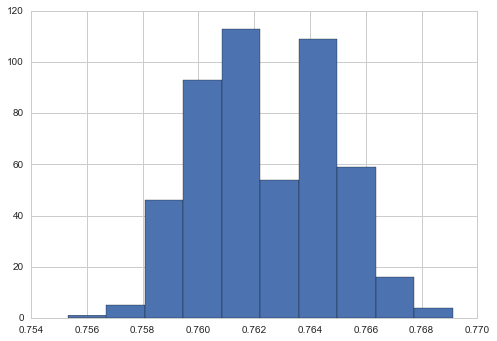

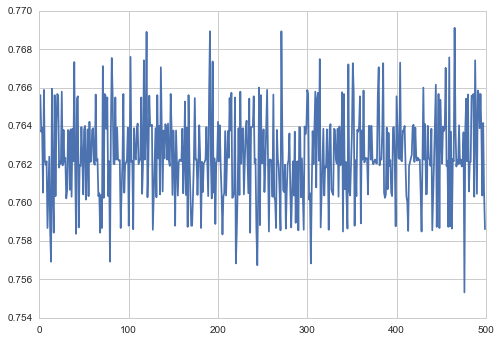

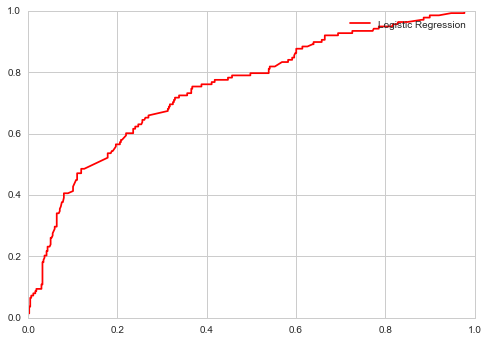

In [280]:
print(avg_score)
plt.hist(lr_avg_score_list)
plt.show()
plt.plot(lr_avg_score_list)
plt.show()
plt.plot(nlr_fpr, nlr_tpr, c='r', label='Logistic Regression')
plt.legend()
plt.show()

0.760426073805


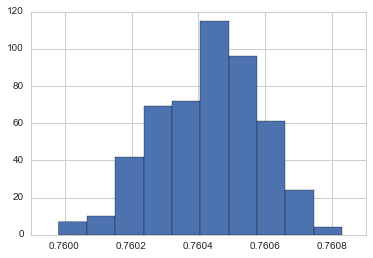

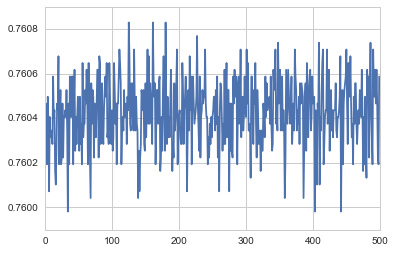

In [230]:
svm_avg_score, svm_avg_score_list = re_iterate(best_svm, train_data[test_cols[1:]], train_data.iloc[:,-1],10,500)
print(svm_avg_score)
plt.hist(svm_avg_score_list)
plt.show()
plt.plot(svm_avg_score_list)

0.777858378705


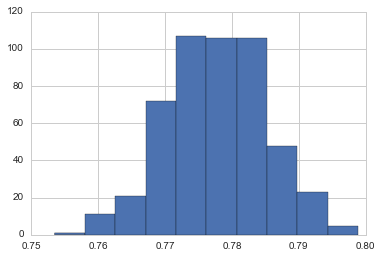

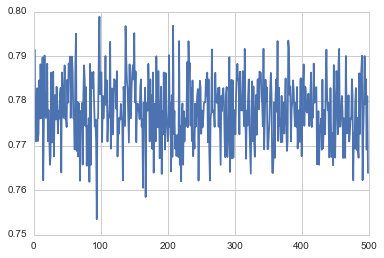

In [231]:
ada_avg_score, ada_avg_score_list = re_iterate(best_ada, train_data[test_cols[1:]], train_data.iloc[:,-1],10,500)
print(ada_avg_score)
plt.hist(ada_avg_score_list)
plt.show()
plt.plot(ada_avg_score_list)

0.785337931034


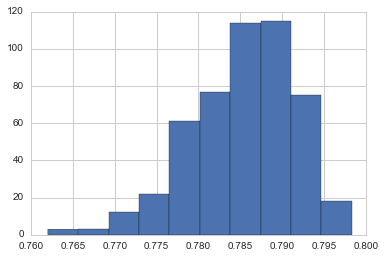

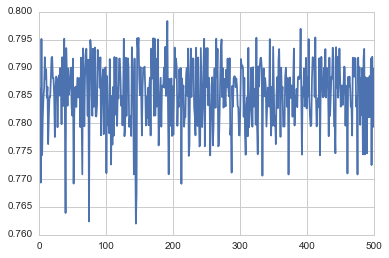

In [232]:
xgb_avg_score, xgb_avg_score_list = re_iterate(best_xgb, train_data[test_cols[1:]], train_data.iloc[:,-1],10,500)
print(xgb_avg_score)
plt.hist(xgb_avg_score_list)
plt.show()
plt.plot(xgb_avg_score_list)

0.789866243194


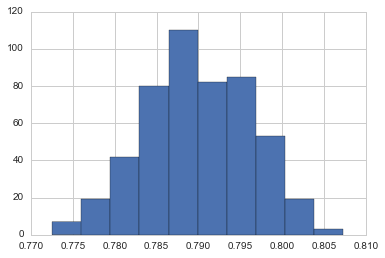

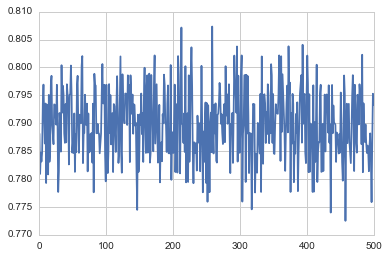

In [233]:
rf_avg_score, rf_avg_score_list = re_iterate(best_rf, train_data[test_cols[1:]], train_data.iloc[:,-1],10,500)
print(rf_avg_score)
plt.hist(rf_avg_score_list)
plt.show()
plt.plot(rf_avg_score_list)

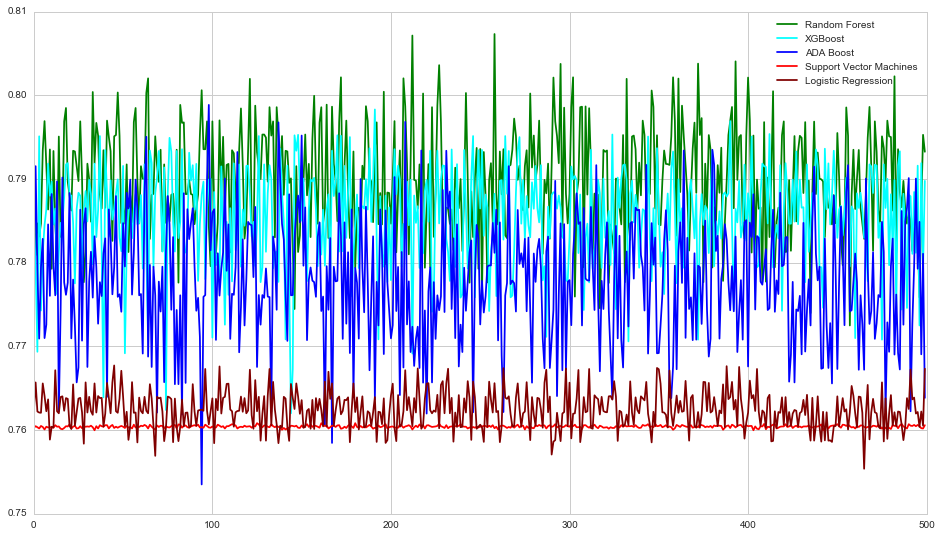

In [270]:
sns.set_style('whitegrid')
plt.figure(figsize=(16,9))
plt.plot(rf_avg_score_list, color='green', label = 'Random Forest')
plt.plot(xgb_avg_score_list, color='cyan', label = 'XGBoost')
plt.plot(ada_avg_score_list, color = 'blue', label = 'ADA Boost')
plt.plot(svm_avg_score_list, color='red', label = 'Support Vector Machines')
plt.plot(lr_avg_score_list, color='maroon', label='Logistic Regression')
plt.legend()
# plt.set(xlim(0,600))
plt.show()